In [4]:
import pandas as pd
import numpy as np
from bmtk.analyzer import nodes_table
import matplotlib.pyplot as plt

In [191]:
stimulus = 'diagonal-r2l'

In [192]:
output_file = f'./{stimulus}/spikes-{stimulus}.csv'
nodes_id_file = 'v1_nodes.h5'
node_types_file = 'v1_node_types.csv'

In [193]:
df_spikes = pd.read_csv(output_file, sep=' ')
df_node_types = pd.read_csv(node_types_file, sep=' ')
df_nodes_table = nodes_table(nodes_file=nodes_id_file, population='v1')

df_spikes = df_spikes.rename(columns={'node_ids': 'node_id'})

df_node_types = df_node_types.drop(['location', 'gaba_synapse', 'ei', 'population', 'dynamics_params', 'model_template', 'model_type'], axis=1)

In [194]:
df_spikes.head()

timestamps population  node_id
0       65.00         v1       19
1     1086.25         v1   158302
2      117.00         v1   158302
3      874.25         v1   158301
4      728.50         v1   158301

In [195]:
df_node_types.head()

node_type_id pop_name
0     488419491   e5Rbp4
1     485880739   e5Rbp4
2     485574832   e5Rbp4
3     487664663   e5Rbp4
4     471129934   e5Rbp4

In [196]:
df_nodes_table.head()

node_id  node_type_id  tuning_angle           x           y           z
0        0     488419491      0.000000  110.906706 -431.668136  623.732700
1        1     471129934      0.017278  526.329919 -564.693981 -555.341582
2        2     488419491      0.034556  197.897567 -505.737886  709.692990
3        3     486052980      0.051833  400.302561 -465.458859 -224.639993
4        4     471129934      0.069111 -766.751467 -556.178476   55.929619

In [197]:
# Combine node id to their respective node_types

node_id2types = pd.merge(df_spikes, df_nodes_table, on = 'node_id', how = 'left')
node_id2types.dropna()

timestamps population  node_id  node_type_id  tuning_angle  \
0            65.00         v1       19     488419491      0.328278   
1          1086.25         v1   158302     475585413    301.676576   
2           117.00         v1   158302     475585413    301.676576   
3           874.25         v1   158301     475585413    301.569560   
4           728.50         v1   158301     475585413    301.569560   
...            ...        ...      ...           ...           ...   
143732      449.50         v1    67913     487661754    340.899281   
143733      558.50         v1    67913     487661754    340.899281   
143734      624.75         v1    67913     487661754    340.899281   
143735      216.75         v1    67913     487661754    340.899281   
143736     1204.00         v1   230780     471789504    358.830325   

                 x           y           z  
0       -17.189715 -636.421152  762.321000  
1      -450.868376  -97.738084 -598.280416  
2      -450.868376  -97.738084 -598.280416  
3       -20.174850  -84.890446 -630.907874  
4       -20.174850  -84.890446 -630.907874  
...            ...         ...         ...  
143732 -713.942553 -286.875069 -401.265283  
143733 -713.942553 -286.875069 -401.265283  
143734 -713.942553 -286.875069 -401.265283  
143735 -713.942553 -286.875069 -401.265283  
143736  560.820195 -659.603342 -411.385626  

[143737 rows x 8 columns]

In [198]:
# Combine node_types to their respective population

node_id2pop = pd.merge(node_id2types, df_node_types, on = 'node_type_id', how = 'left')

In [199]:
node_id2pop.dropna()

timestamps population  node_id  node_type_id  tuning_angle  \
0            65.00         v1       19     488419491      0.328278   
1          1086.25         v1   158302     475585413    301.676576   
2           117.00         v1   158302     475585413    301.676576   
3           874.25         v1   158301     475585413    301.569560   
4           728.50         v1   158301     475585413    301.569560   
...            ...        ...      ...           ...           ...   
143732      449.50         v1    67913     487661754    340.899281   
143733      558.50         v1    67913     487661754    340.899281   
143734      624.75         v1    67913     487661754    340.899281   
143735      216.75         v1    67913     487661754    340.899281   
143736     1204.00         v1   230780     471789504    358.830325   

                 x           y           z pop_name  
0       -17.189715 -636.421152  762.321000   e5Rbp4  
1      -450.868376  -97.738084 -598.280416  i1Htr3a  
2      -450.868376  -97.738084 -598.280416  i1Htr3a  
3       -20.174850  -84.890446 -630.907874  i1Htr3a  
4       -20.174850  -84.890446 -630.907874  i1Htr3a  
...            ...         ...         ...      ...  
143732 -713.942553 -286.875069 -401.265283  e23Cux2  
143733 -713.942553 -286.875069 -401.265283  e23Cux2  
143734 -713.942553 -286.875069 -401.265283  e23Cux2  
143735 -713.942553 -286.875069 -401.265283  e23Cux2  
143736  560.820195 -659.603342 -411.385626  e6Ntsr1  

[143737 rows x 9 columns]

In [200]:
# Save file
node_id2pop.to_csv(f'node_id2pop_{stimulus}.csv', index=False)

In [201]:
df_l1_e.shape

(0, 9)

In [202]:
df_l1_i.shape

(9161, 9)

In [203]:
# Separate out the file into the different layers
df_l1_e = node_id2pop[node_id2pop['pop_name'].str.contains("e1")]
df_l1_i = node_id2pop[node_id2pop['pop_name'].str.contains("i1")]

df_l23_e = node_id2pop[node_id2pop['pop_name'].str.contains("e23")]
df_l23_i = node_id2pop[node_id2pop['pop_name'].str.contains("i23")]

df_l4_e = node_id2pop[node_id2pop['pop_name'].str.contains("e4")]
df_l4_i = node_id2pop[node_id2pop['pop_name'].str.contains("i4")]

df_l5_e = node_id2pop[node_id2pop['pop_name'].str.contains("e5")]
df_l5_i = node_id2pop[node_id2pop['pop_name'].str.contains("i5")]

df_l6_e = node_id2pop[node_id2pop['pop_name'].str.contains("e6")]
df_l6_i = node_id2pop[node_id2pop['pop_name'].str.contains("i6")]

In [204]:
# Combine inhibitory and excitatory signals

df_l1 = pd.concat([df_l1_e, df_l1_i], axis=0)
df_l23 = pd.concat([df_l23_e, df_l23_i], axis=0)
df_l4 = pd.concat([df_l4_e, df_l4_i], axis=0)
df_l5 = pd.concat([df_l5_e, df_l5_i], axis=0)
df_l6 = pd.concat([df_l6_e, df_l6_i], axis=0)

In [205]:
df_l1.to_csv(f'L1_{stimulus}.csv', index=False)
df_l23.to_csv(f'L23_{stimulus}.csv', index=False)
df_l4.to_csv(f'L4_{stimulus}.csv', index=False)
df_l5.to_csv(f'L5_{stimulus}.csv', index=False)
df_l6.to_csv(f'L6_{stimulus}.csv', index=False)

In [17]:
# ! pip install seaborn

In [24]:
import seaborn as sns
import matplotlib.cm as cm

In [44]:
#############################
# Visual Analysis

l4_horizonal_input = 'horizontal/L4_horizontal.csv'
l4_vertical_input = 'vertical/L4_vertical.csv'

l4_horizontal = pd.read_csv(l4_horizonal_input).sort_values('timestamps')
l4_vertical = pd.read_csv(l4_vertical_input).sort_values('timestamps')

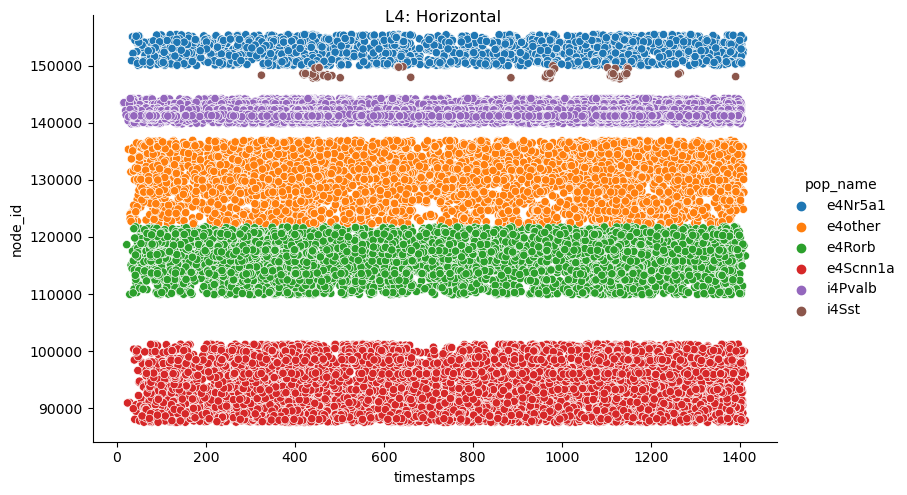

In [32]:
rel = sns.relplot(data=l4_horizontal, x='timestamps', y='node_id', hue='pop_name', aspect=1.61)
rel.fig.suptitle('L4: Horizontal')
plt.show()

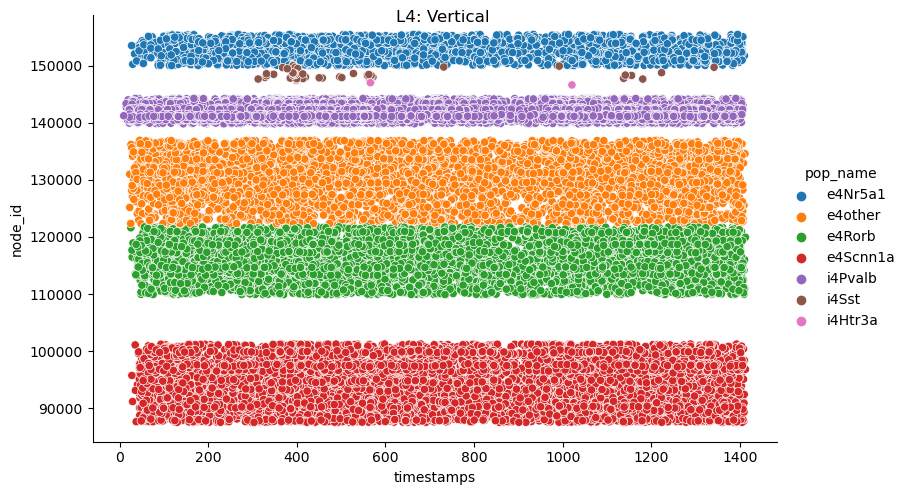

In [34]:
rel = sns.relplot(data=l4_vertical, x='timestamps', y='node_id', hue='pop_name', aspect=1.61)
rel.fig.suptitle('L4: Vertical')
plt.show()

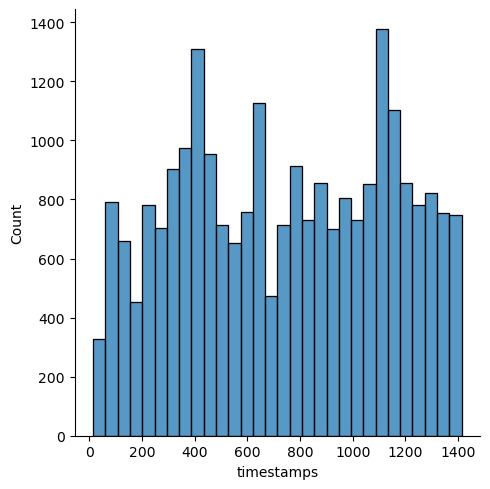

In [40]:
sns.displot(l4_horizontal, x="timestamps")

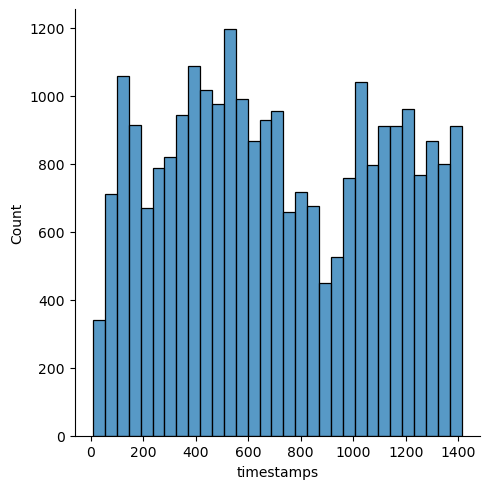

In [41]:
sns.displot(l4_vertical, x="timestamps")

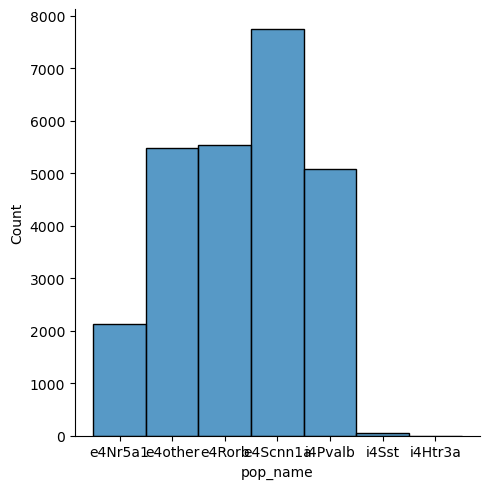

In [38]:
sns.displot(l4_vertical, x="pop_name")

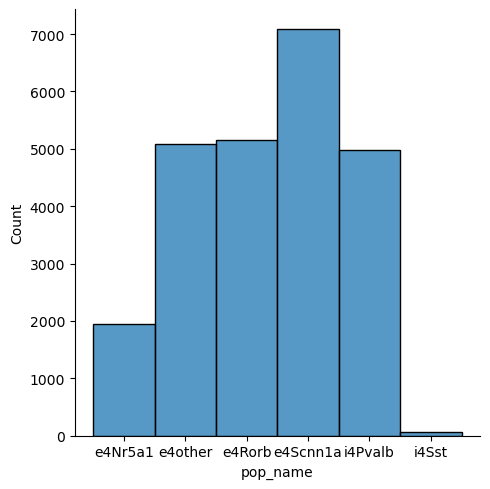

In [39]:
sns.displot(l4_horizontal, x="pop_name")

In [53]:
l4_vertical['time bins'] = pd.qcut(l4_vertical['timestamps'], q=4).astype(str)

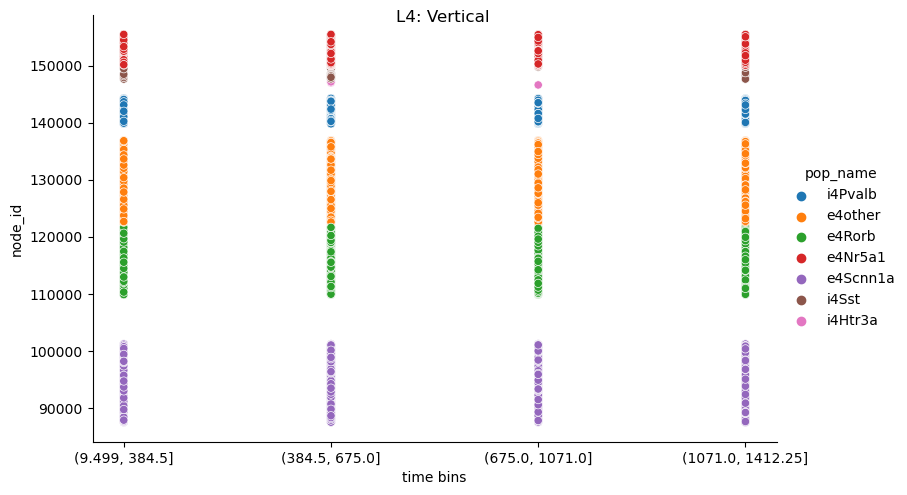

In [55]:
rel = sns.relplot(data=l4_vertical, x='time bins', y='node_id', hue='pop_name', aspect=1.61)
rel.fig.suptitle('L4: Vertical')
plt.show()